In [1]:
import pandas as pd


In [2]:
import csv


In [3]:
# CSV-Datei einlesen
df = pd.read_csv('/workspaces/codespaces-jupyter/data/european_wholesale_electricity_price_data_monthly-5.csv')

# Die ersten Zeilen anzeigen, um die Variablennamen zu überprüfen
print(df.head())

   Country ISO3 Code        Date  Price (EUR/MWhe)
0  Austria       AUT  2015-01-01             31.68
1  Austria       AUT  2015-02-01             36.69
2  Austria       AUT  2015-03-01             31.30
3  Austria       AUT  2015-04-01             29.78
4  Austria       AUT  2015-05-01             25.33


In [4]:
# Zeilen löschen, wenn der ISO3-Code nicht 'DEU' ist
df = df[df['ISO3 Code'] == 'DEU']

# Das gefilterte DataFrame anzeigen
print(df.head())

     Country ISO3 Code        Date  Price (EUR/MWhe)
554  Germany       DEU  2015-01-01             31.68
555  Germany       DEU  2015-02-01             36.69
556  Germany       DEU  2015-03-01             31.30
557  Germany       DEU  2015-04-01             29.78
558  Germany       DEU  2015-05-01             25.33


In [5]:
import matplotlib.pyplot as plt

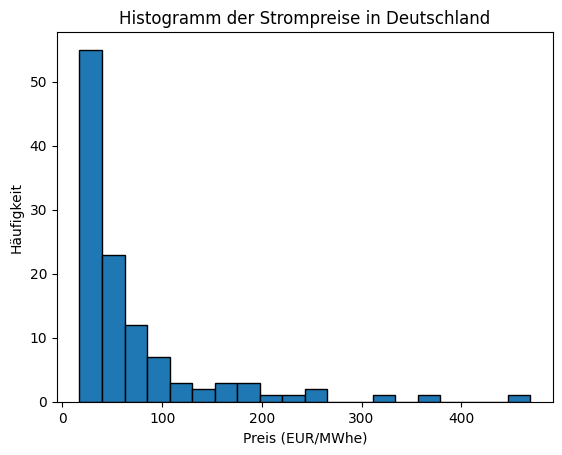

In [6]:
# Histogramm der Strompreise anzeigen
plt.hist(df['Price (EUR/MWhe)'], bins=20, edgecolor='black')
plt.title('Histogramm der Strompreise in Deutschland')
plt.xlabel('Preis (EUR/MWhe)')
plt.ylabel('Häufigkeit')
plt.show()

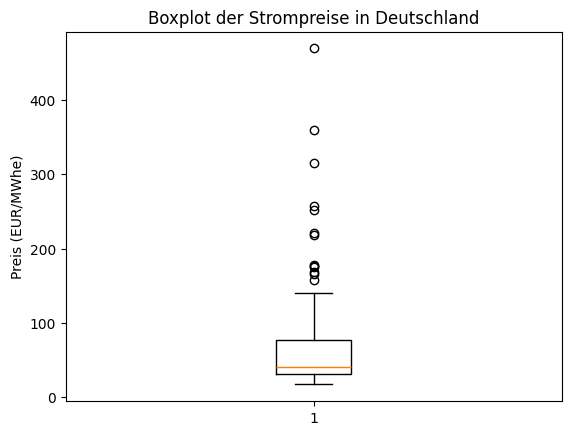

In [7]:
# Boxplot der Strompreise anzeigen, um Ausreißer zu identifizieren
plt.boxplot(df['Price (EUR/MWhe)'])
plt.title('Boxplot der Strompreise in Deutschland')
plt.ylabel('Preis (EUR/MWhe)')
plt.show()

In [8]:
# Ausreißer identifizieren
Q1 = df['Price (EUR/MWhe)'].quantile(0.25)
Q3 = df['Price (EUR/MWhe)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price (EUR/MWhe)'] < lower_bound) | (df['Price (EUR/MWhe)'] > upper_bound)]

# Daten der Ausreißer anzeigen
print(outliers[['Date', 'Price (EUR/MWhe)']])

           Date  Price (EUR/MWhe)
636  2021-11-01            176.25
637  2021-12-01            220.96
638  2022-01-01            167.87
640  2022-03-01            251.76
641  2022-04-01            166.00
642  2022-05-01            177.51
643  2022-06-01            218.18
644  2022-07-01            315.26
645  2022-08-01            469.35
646  2022-09-01            360.18
647  2022-10-01            157.78
648  2022-11-01            175.45
649  2022-12-01            256.66


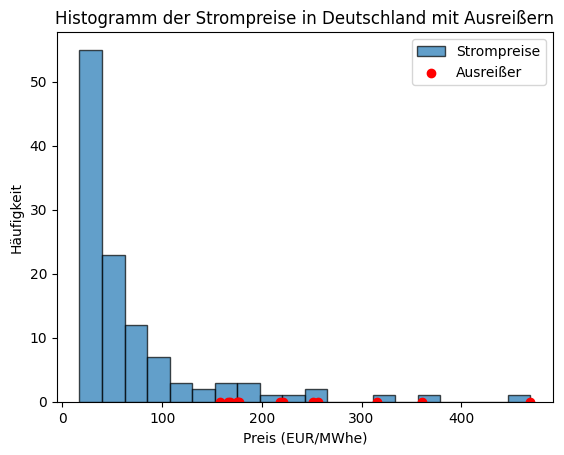

           Date  Price (EUR/MWhe)
636  2021-11-01            176.25
637  2021-12-01            220.96
638  2022-01-01            167.87
640  2022-03-01            251.76
641  2022-04-01            166.00
642  2022-05-01            177.51
643  2022-06-01            218.18
644  2022-07-01            315.26
645  2022-08-01            469.35
646  2022-09-01            360.18
647  2022-10-01            157.78
648  2022-11-01            175.45
649  2022-12-01            256.66


In [9]:
# Histogramm der Strompreise anzeigen
plt.hist(df['Price (EUR/MWhe)'], bins=20, edgecolor='black', alpha=0.7, label='Strompreise')

# Ausreißer als separate Punkte markieren
plt.scatter(outliers['Price (EUR/MWhe)'], [0]*len(outliers), color='red', label='Ausreißer')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Histogramm der Strompreise in Deutschland mit Ausreißern')
plt.xlabel('Preis (EUR/MWhe)')
plt.ylabel('Häufigkeit')
plt.legend()

# Diagramm anzeigen
plt.show()

# Daten der Ausreißer anzeigen
print(outliers[['Date', 'Price (EUR/MWhe)']])

In [10]:
# Höchsten Wert für den Preis anzeigen inklusive Datum
max_price_row = df.loc[df['Price (EUR/MWhe)'].idxmax()]
print(f"Höchster Preis: {max_price_row['Price (EUR/MWhe)']} EUR/MWhe am {max_price_row['Date']}")

Höchster Preis: 469.35 EUR/MWhe am 2022-08-01


In [11]:
# Niedrigsten Wert für den Preis anzeigen inklusive Datum
min_price_row = df.loc[df['Price (EUR/MWhe)'].idxmin()]
print(f"Niedrigster Preis: {min_price_row['Price (EUR/MWhe)']} EUR/MWhe am {min_price_row['Date']}")

Niedrigster Preis: 17.05 EUR/MWhe am 2020-04-01


In [12]:
# Durchschnittswert für den Preis anzeigen
average_price = df['Price (EUR/MWhe)'].mean()
print(f"Durchschnittlicher Preis: {average_price:.2f} EUR/MWhe")

Durchschnittlicher Preis: 70.71 EUR/MWhe


In [13]:
# Medianwert für den Preis anzeigen
median_price = df['Price (EUR/MWhe)'].median()
print(f"Medianpreis: {median_price:.2f} EUR/MWhe")

Medianpreis: 40.12 EUR/MWhe


In [14]:
# Neue CSV-Datei einlesen
new_df = pd.read_csv('/workspaces/codespaces-jupyter/data/european_wholesale_electricity_price_data_daily-5.csv')

In [15]:
# Die ersten Zeilen der neuen Daten anzeigen
print(new_df.head())

   Country ISO3 Code        Date  Price (EUR/MWhe)
0  Austria       AUT  2015-01-01             35.86
1  Austria       AUT  2015-01-02             35.86
2  Austria       AUT  2015-01-03             35.86
3  Austria       AUT  2015-01-04             35.86
4  Austria       AUT  2015-01-05             36.18


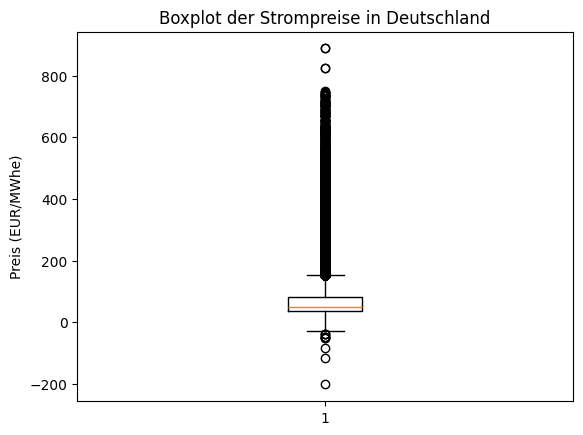

             Date  Price (EUR/MWhe)
1032   2017-10-29            -47.46
2449   2021-09-15            167.91
2450   2021-09-16            166.43
2451   2021-09-17            158.23
2454   2021-09-20            153.85
...           ...               ...
94975  2022-12-21            208.72
94976  2022-12-22            178.56
95323  2023-12-04            151.90
95324  2023-12-05            159.86
95355  2024-01-05            192.75

[10132 rows x 2 columns]


In [16]:
# Ausreißer identifizieren
Q1 = new_df['Price (EUR/MWhe)'].quantile(0.25)
Q3 = new_df['Price (EUR/MWhe)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = new_df[(new_df['Price (EUR/MWhe)'] < lower_bound) | (new_df['Price (EUR/MWhe)'] > upper_bound)]

# Boxplot der Strompreise anzeigen, um Ausreißer zu identifizieren
plt.boxplot(new_df['Price (EUR/MWhe)'])
plt.title('Boxplot der Strompreise in Deutschland')
plt.ylabel('Preis (EUR/MWhe)')
plt.show()

# Daten der Ausreißer anzeigen
print(outliers[['Date', 'Price (EUR/MWhe)']])

In [17]:
# Niedrigsten Wert für den Preis anzeigen inklusive Datum
min_price_row = new_df.loc[new_df['Price (EUR/MWhe)'].idxmin()]
print(f"Niedrigster Preis: {min_price_row['Price (EUR/MWhe)']} EUR/MWhe am {min_price_row['Date']}")

Niedrigster Preis: -202.29 EUR/MWhe am 2023-11-24


In [18]:
# Höchsten Wert für den Preis anzeigen inklusive Datum
max_price_row = new_df.loc[new_df['Price (EUR/MWhe)'].idxmax()]
print(f"Höchster Preis: {max_price_row['Price (EUR/MWhe)']} EUR/MWhe am {max_price_row['Date']}")

Höchster Preis: 888.09 EUR/MWhe am 2024-01-05


In [19]:
# Medianwert für den Preis anzeigen
median_price = new_df['Price (EUR/MWhe)'].median()
print(f"Medianpreis: {median_price:.2f} EUR/MWhe")

Medianpreis: 48.66 EUR/MWhe


In [20]:
# Durchschnittswert für den Preis anzeigen
average_price = new_df['Price (EUR/MWhe)'].mean()
print(f"Durchschnittlicher Preis: {average_price:.2f} EUR/MWhe")

Durchschnittlicher Preis: 75.11 EUR/MWhe


In [21]:
# Letztes angegebenes Datum anzeigen
last_date = new_df['Date'].max()
print(f"Letztes angegebenes Datum: {last_date}")

Letztes angegebenes Datum: 2024-07-31


In [22]:
# Letztes angegebenes Datum im ersten Datensatz anzeigen
last_date_first_dataset = df['Date'].max()
print(f"Letztes angegebenes Datum im ersten Datensatz: {last_date_first_dataset}")

Letztes angegebenes Datum im ersten Datensatz: 2024-07-01


In [23]:
# Deskriptive Statistik für den ersten Datensatz anzeigen
descriptive_stats = df['Price (EUR/MWhe)'].describe()
print(descriptive_stats)

count    115.000000
mean      70.712696
std       72.501823
min       17.050000
25%       31.645000
50%       40.120000
75%       77.055000
max      469.350000
Name: Price (EUR/MWhe), dtype: float64


In [24]:
# Deskriptive Statistik für den ersten Datensatz anzeigen
descriptive_stats = new_df['Price (EUR/MWhe)'].describe()
print(descriptive_stats)

count    95564.000000
mean        75.105242
std         76.808512
min       -202.290000
25%         35.080000
50%         48.660000
75%         81.690000
max        888.090000
Name: Price (EUR/MWhe), dtype: float64


In [25]:
# 1%-99% Quantile berechnen
lower_quantile = df['Price (EUR/MWhe)'].quantile(0.01)
upper_quantile = df['Price (EUR/MWhe)'].quantile(0.99)

# Ausreißer identifizieren
outliers = df[(df['Price (EUR/MWhe)'] < lower_quantile) | (df['Price (EUR/MWhe)'] > upper_quantile)]

# Deskriptive Statistik für den ersten Datensatz anzeigen
descriptive_stats = df['Price (EUR/MWhe)'].describe()
print("Deskriptive Statistik:")
print(descriptive_stats)

# 1%-99% Quantile anzeigen
print(f"\n1%-Quantil: {lower_quantile:.2f} EUR/MWhe")
print(f"99%-Quantil: {upper_quantile:.2f} EUR/MWhe")

# Daten der Ausreißer anzeigen
print("\nAusreißer:")
print(outliers[['Date', 'Price (EUR/MWhe)']])

Deskriptive Statistik:
count    115.000000
mean      70.712696
std       72.501823
min       17.050000
25%       31.645000
50%       40.120000
75%       77.055000
max      469.350000
Name: Price (EUR/MWhe), dtype: float64

1%-Quantil: 18.20 EUR/MWhe
99%-Quantil: 353.89 EUR/MWhe

Ausreißer:
           Date  Price (EUR/MWhe)
617  2020-04-01             17.05
618  2020-05-01             17.60
645  2022-08-01            469.35
646  2022-09-01            360.18


In [26]:
# 1%-99% Quantile berechnen
lower_quantile = new_df['Price (EUR/MWhe)'].quantile(0.01)
upper_quantile = new_df['Price (EUR/MWhe)'].quantile(0.99)

# Ausreißer identifizieren
outliers = new_df[(new_df['Price (EUR/MWhe)'] < lower_quantile) | (new_df['Price (EUR/MWhe)'] > upper_quantile)]

# Deskriptive Statistik für den ersten Datensatz anzeigen
descriptive_stats_new_df = new_df['Price (EUR/MWhe)'].describe()
print("Deskriptive Statistik:")
print(descriptive_stats_new_df)

# 1%-99% Quantile anzeigen
print(f"\n1%-Quantil: {lower_quantile:.2f} EUR/MWhe")
print(f"99%-Quantil: {upper_quantile:.2f} EUR/MWhe")

# Daten der Ausreißer anzeigen
print("\nAusreißer:")
print(outliers[['Date', 'Price (EUR/MWhe)']])

Deskriptive Statistik:
count    95564.000000
mean        75.105242
std         76.808512
min       -202.290000
25%         35.080000
50%         48.660000
75%         81.690000
max        888.090000
Name: Price (EUR/MWhe), dtype: float64

1%-Quantil: 7.04 EUR/MWhe
99%-Quantil: 407.87 EUR/MWhe

Ausreißer:
             Date  Price (EUR/MWhe)
10     2015-01-11              1.49
101    2015-04-12              0.08
129    2015-05-10              3.98
248    2015-09-06              2.87
359    2015-12-26              6.88
...           ...               ...
95489  2024-05-18              6.58
95511  2024-06-09             -0.81
95538  2024-07-06              4.53
95539  2024-07-07             -0.24
95560  2024-07-28              1.16

[1912 rows x 2 columns]


In [27]:
# Datumsspalte in ein Datetime-Format konvertieren
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Monat und Jahr extrahieren
new_df['YearMonth'] = new_df['Date'].dt.to_period('M')

# Durchschnittswerte für die Monate berechnen
monthly_avg = new_df.groupby('YearMonth')['Price (EUR/MWhe)'].mean().reset_index()

# Ergebnisse anzeigen
print(monthly_avg)

    YearMonth  Price (EUR/MWhe)
0     2015-01         39.409587
1     2015-02         41.030757
2     2015-03         36.712632
3     2015-04         35.725053
4     2015-05         32.623019
..        ...               ...
110   2024-03         62.625806
111   2024-04         57.315816
112   2024-05         65.404138
113   2024-06         76.712276
114   2024-07         85.454758

[115 rows x 2 columns]


In [28]:
# Datumsspalte in ein Datetime-Format konvertieren
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Monat und Jahr extrahieren
new_df['YearMonth'] = new_df['Date'].dt.to_period('M')

# Durchschnittswerte für die Monate berechnen
monthly_avg = new_df.groupby('YearMonth')['Price (EUR/MWhe)'].mean().reset_index()
monthly_avg.columns = ['YearMonth', 'Monthly_Avg_Price']

# Die monatlichen Durchschnittspreise dem Datensatz new_df als neue Variable hinzufügen
new_df = new_df.merge(monthly_avg, on='YearMonth', how='left')

# Ergebnisse anzeigen
print(new_df.head())

   Country ISO3 Code       Date  Price (EUR/MWhe) YearMonth  Monthly_Avg_Price
0  Austria       AUT 2015-01-01             35.86   2015-01          39.409587
1  Austria       AUT 2015-01-02             35.86   2015-01          39.409587
2  Austria       AUT 2015-01-03             35.86   2015-01          39.409587
3  Austria       AUT 2015-01-04             35.86   2015-01          39.409587
4  Austria       AUT 2015-01-05             36.18   2015-01          39.409587


In [29]:
new_df = new_df[new_df['ISO3 Code'] == 'DEU']

In [30]:
# Deskriptive Statistik der neuen Variable Monthly_Avg_Price anzeigen
descriptive_stats_monthly_avg = new_df['Monthly_Avg_Price'].describe()
print("Deskriptive Statistik der monatlichen Durchschnittspreise:")
print(descriptive_stats_monthly_avg)

Deskriptive Statistik der monatlichen Durchschnittspreise:
count    3500.000000
mean       74.657507
std        66.858968
min        20.473583
25%        38.149747
50%        46.033088
75%        85.454758
max       414.678973
Name: Monthly_Avg_Price, dtype: float64


In [31]:
# Deskriptive Statistik für den ersten Datensatz anzeigen
descriptive_stats = df['Price (EUR/MWhe)'].describe()
print("Deskriptive Statistik:")
print(descriptive_stats)

Deskriptive Statistik:
count    115.000000
mean      70.712696
std       72.501823
min       17.050000
25%       31.645000
50%       40.120000
75%       77.055000
max      469.350000
Name: Price (EUR/MWhe), dtype: float64


In [32]:
# Ersten Datensatz einlesen
df = pd.read_csv('/workspaces/codespaces-jupyter/data/european_wholesale_electricity_price_data_monthly-5.csv')

# Zeilen löschen, wenn der ISO3-Code nicht 'DEU' ist
df = df[df['ISO3 Code'] == 'DEU']

# Datumsspalte in ein Datetime-Format konvertieren
df['Date'] = pd.to_datetime(df['Date'])

# Monat und Jahr extrahieren
df['YearMonth'] = df['Date'].dt.to_period('M')

# Durchschnittswerte für die Monate im ersten Datensatz berechnen
monthly_avg_df = df.groupby('YearMonth')['Price (EUR/MWhe)'].mean().reset_index()
monthly_avg_df.columns = ['YearMonth', 'Monthly_Avg_Price']

# Zweiten Datensatz einlesen
new_df = pd.read_csv('/workspaces/codespaces-jupyter/data/european_wholesale_electricity_price_data_daily-5.csv')

# Zeilen löschen, wenn der ISO3-Code nicht 'DEU' ist
new_df = new_df[new_df['ISO3 Code'] == 'DEU']

# Datumsspalte in ein Datetime-Format konvertieren
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Monat und Jahr extrahieren
new_df['YearMonth'] = new_df['Date'].dt.to_period('M')

# Die monatlichen Durchschnittspreise aus dem ersten Datensatz dem zweiten Datensatz hinzufügen
new_df = new_df.merge(monthly_avg_df, on='YearMonth', how='left')

# Ergebnisse anzeigen
print(new_df.head())

# Deskriptive Statistik der neuen Variable Monthly_Avg_Price anzeigen
descriptive_stats_monthly_avg = new_df['Monthly_Avg_Price'].describe()
print("Deskriptive Statistik der monatlichen Durchschnittspreise:")
print(descriptive_stats_monthly_avg)

   Country ISO3 Code       Date  Price (EUR/MWhe) YearMonth  Monthly_Avg_Price
0  Germany       DEU 2015-01-01             35.86   2015-01              31.68
1  Germany       DEU 2015-01-02             35.86   2015-01              31.68
2  Germany       DEU 2015-01-03             35.86   2015-01              31.68
3  Germany       DEU 2015-01-04             35.86   2015-01              31.68
4  Germany       DEU 2015-01-05             36.18   2015-01              31.68
Deskriptive Statistik der monatlichen Durchschnittspreise:
count    3500.000000
mean       70.792471
std        72.433335
min        17.050000
25%        31.610000
50%        40.120000
75%        77.480000
max       469.350000
Name: Monthly_Avg_Price, dtype: float64


In [33]:
# Durchschnittswerte für die Monate im zweiten Datensatz berechnen
monthly_avg_new_df = new_df.groupby('YearMonth')['Price (EUR/MWhe)'].mean().reset_index()
print(monthly_avg_new_df)

    YearMonth  Price (EUR/MWhe)
0     2015-01         31.679677
1     2015-02         36.694643
2     2015-03         31.297742
3     2015-04         29.778333
4     2015-05         25.329677
..        ...               ...
110   2024-03         64.664194
111   2024-04         62.393000
112   2024-05         67.284516
113   2024-06         72.890000
114   2024-07         67.710323

[115 rows x 2 columns]


In [34]:
# Die monatlichen Durchschnittspreise aus dem zweiten Datensatz als Variable hinzufügen
new_df = new_df.merge(monthly_avg_new_df, on='YearMonth', how='left')

# Ergebnisse anzeigen
print(new_df.head())

   Country ISO3 Code       Date  Price (EUR/MWhe)_x YearMonth  \
0  Germany       DEU 2015-01-01               35.86   2015-01   
1  Germany       DEU 2015-01-02               35.86   2015-01   
2  Germany       DEU 2015-01-03               35.86   2015-01   
3  Germany       DEU 2015-01-04               35.86   2015-01   
4  Germany       DEU 2015-01-05               36.18   2015-01   

   Monthly_Avg_Price  Price (EUR/MWhe)_y  
0              31.68           31.679677  
1              31.68           31.679677  
2              31.68           31.679677  
3              31.68           31.679677  
4              31.68           31.679677  


In [35]:
electricity_prices= pd.read_csv('/workspaces/codespaces-jupyter/data/electricity_prices (1).csv')
electricity_prices = electricity_prices.drop(columns=['Country','ISO3 Code','Date','Price (EUR/MWhe)_x', 'Monthly_Avg_Price'])

